In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop(columns="Type")
y = df["Type"]

In [9]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
ypred

array([1, 7, 1, 7, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 6, 5, 7, 1, 2, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 2, 2, 2, 7, 2, 1, 2, 2, 1, 1, 1],
      dtype=int64)

In [12]:
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.8176470588235294, 0.6744186046511628)

In [13]:
train = []
test = []

for i in range(1,20):
    knn = KNeighborsClassifier()
    knn.fit(xtrain, ytrain)
    knn.predict(xtest)

    train.append(knn.score(xtrain, ytrain))
    test.append(knn.score(xtest, ytest))

In [14]:
train

[0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589,
 0.7352941176470589]

In [15]:
test

[0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745,
 0.6511627906976745]

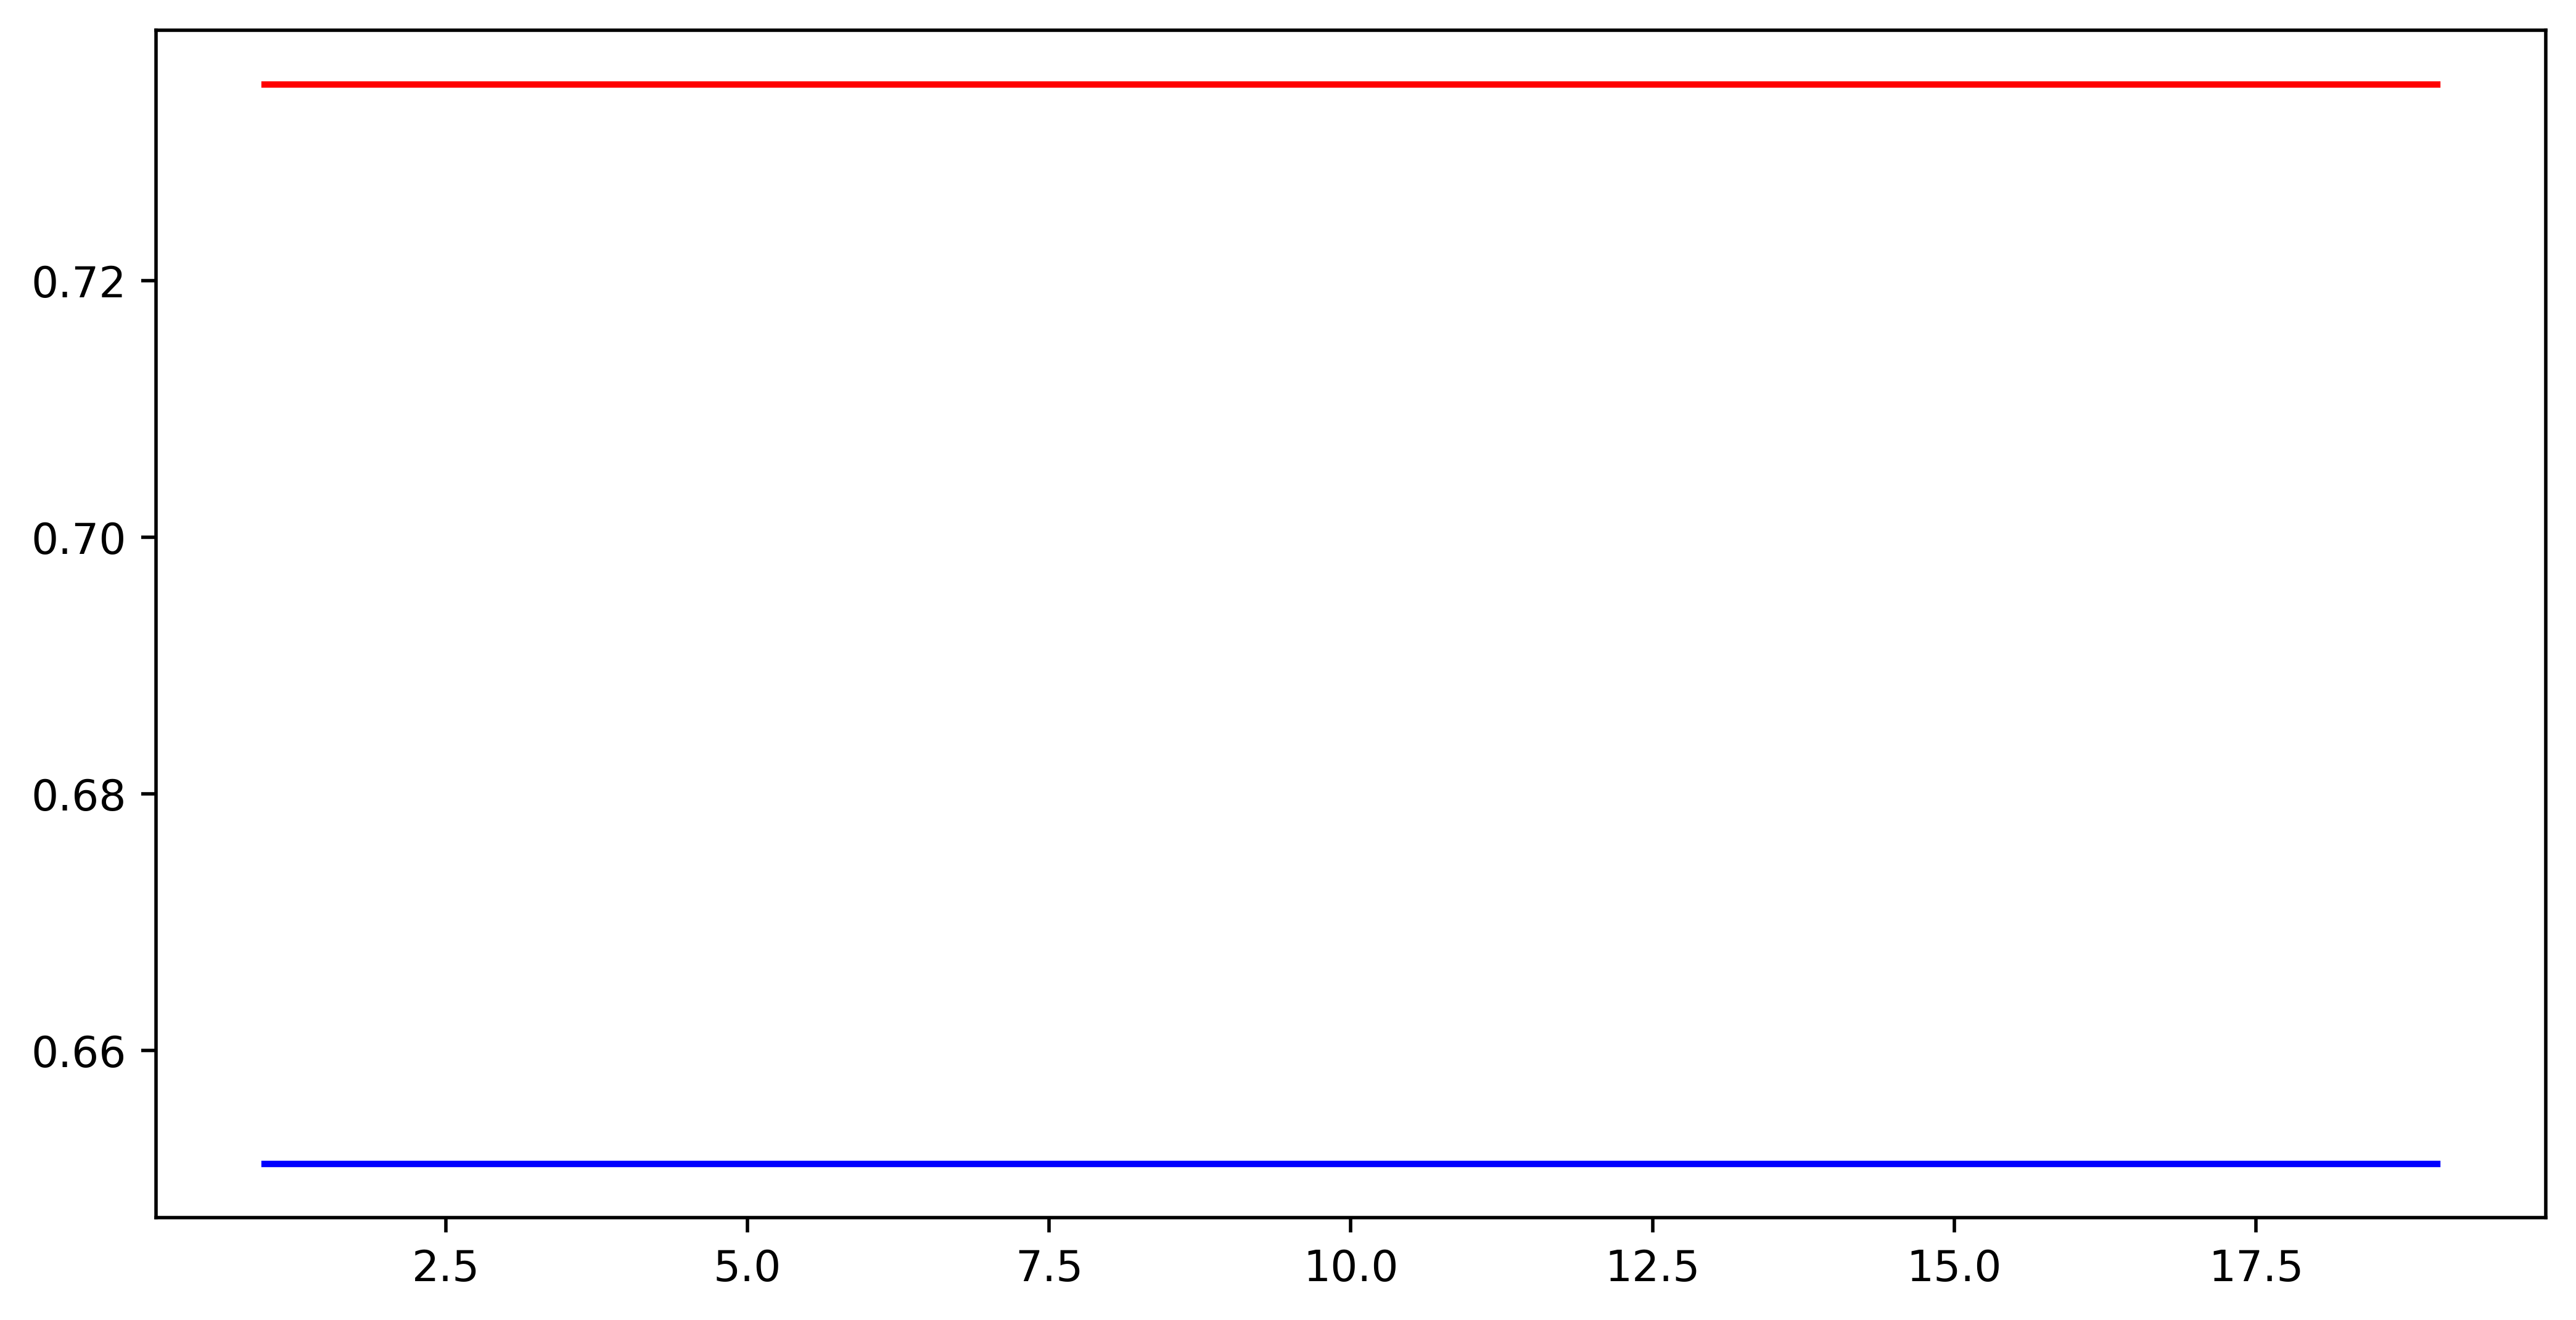

In [16]:
plt.plot(range(1,20), train, color = "red")
plt.plot(range(1,20), test, color = "blue")

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
ypred

array([1, 7, 1, 7, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 6, 5, 7, 1, 2, 2, 1, 7,
       7, 7, 1, 5, 1, 1, 6, 1, 1, 2, 2, 2, 2, 7, 2, 1, 2, 2, 1, 1, 1],
      dtype=int64)